# ¡Hola, Julio!  

Mi nombre es Carlos Ortiz, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# Descripcipción del proyecto

Estoy emocionado de trabajar en el desarrollo de un modelo para detectar críticas negativas en reseñas de películas. Mi objetivo es construir un sistema inteligente que sea capaz de filtrar y categorizar automáticamente las reseñas según su polaridad, ya sea positiva o negativa.

Para lograr esto, utilizaré un conjunto de datos de reseñas de películas de IMDB que incluye etiquetas de polaridad. Usaré técnicas de procesamiento de lenguaje natural y aprendizaje automático para preprocesar los textos de las reseñas y extraer características relevantes.

El primer paso será explorar y entender el conjunto de datos, identificando las características que me ayudarán a diferenciar las reseñas negativas de las positivas. Luego, realizaré un preprocesamiento de los textos utilizando técnicas como la eliminación de dígitos, signos de puntuación, stopwords y lematización.

Después, emplearé el modelo de Regresión Logística y el algoritmo TF-IDF para convertir el texto preprocesado en una representación numérica adecuada para el aprendizaje automático.

Una vez que tenga los datos preparados, dividiré el conjunto en datos de entrenamiento y prueba. Entrenaré el modelo utilizando el conjunto de entrenamiento y evaluaré su rendimiento utilizando diferentes métricas, como el valor F1, para asegurarme de que el modelo alcance al menos un valor F1 de 0.85.

Si es necesario, realizaré ajustes en los hiperparámetros y probaré diferentes enfoques para mejorar el rendimiento del modelo.

Mi objetivo final es desarrollar un modelo preciso y confiable que permita a la comunidad Film Junky Union categorizar y filtrar reseñas de películas de manera eficiente, brindando una experiencia más enriquecedora y satisfactoria para todos los aficionados de las películas clásicas que forman parte de esta comunidad vanguardista.

Lamentablemente, debido a restricciones de recursos de GPU, no podré utilizar el modelo BERT en este proyecto. BERT es un modelo de lenguaje preentrenado de vanguardia que requiere una gran cantidad de memoria y poder de procesamiento para su funcionamiento óptimo. Aunque BERT es altamente efectivo en tareas de procesamiento de lenguaje natural, su tamaño y complejidad lo hacen poco viable para implementarlo en sistemas con limitaciones de recursos computacionales.

Sin embargo, utilizaré técnicas de procesamiento de lenguaje natural y otros modelos de aprendizaje automático más ligeros, como el modelo de Regresión Logística, para desarrollar un sistema efectivo de clasificación de reseñas de películas. Aunque no tendré acceso a la potencia de BERT, estoy seguro de que podré lograr un buen rendimiento con enfoques alternativos y técnicas adecuadas de preprocesamiento y selección de características. Mi objetivo sigue siendo alcanzar un valor F1 de al menos 0.85 para garantizar la precisión y utilidad del sistema que desarrollaré para la comunidad Film Junky Union.

## Inicialización

In [2]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

from tqdm.auto import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier

import sklearn.metrics as metrics

import warnings

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
#la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [4]:
warnings.filterwarnings("ignore", message="Support for alternate kernels has been removed. Using Gaussian kernel.")

In [5]:
#esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Cargar datos

In [6]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de librerías y la importación de datos.
</div>

In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [8]:
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,4.732900e+04,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,2.556292e+04,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,8.367004e+04,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


In [9]:
df_reviews.isna().sum().sum()

4

In [10]:
df_reviews.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

In [11]:
df_reviews.query("average_rating.isna()")

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
22280,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"This is a truly great film, with excellent dir...",9,pos,1,test,3231
22281,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"A film is beyond all expectations, an excellen...",10,pos,1,test,3232


In [12]:
df_reviews.duplicated().sum()

0

In [13]:
df_reviews.dropna(inplace=True)

Podemos ver que los datos no tienen comno tal informacion que pueda ser problematica al hacer uso de los modelos. Podemos ver que tenemos bastantes categorias de las peliculas y nos ayudan tambien al separar los datos con dos categorias para el uso de modelos en la columna "ds_part".

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con esta exploración inicial.
</div>

## EDA

Veamos el número de películas y reseñas a lo largo de los años.

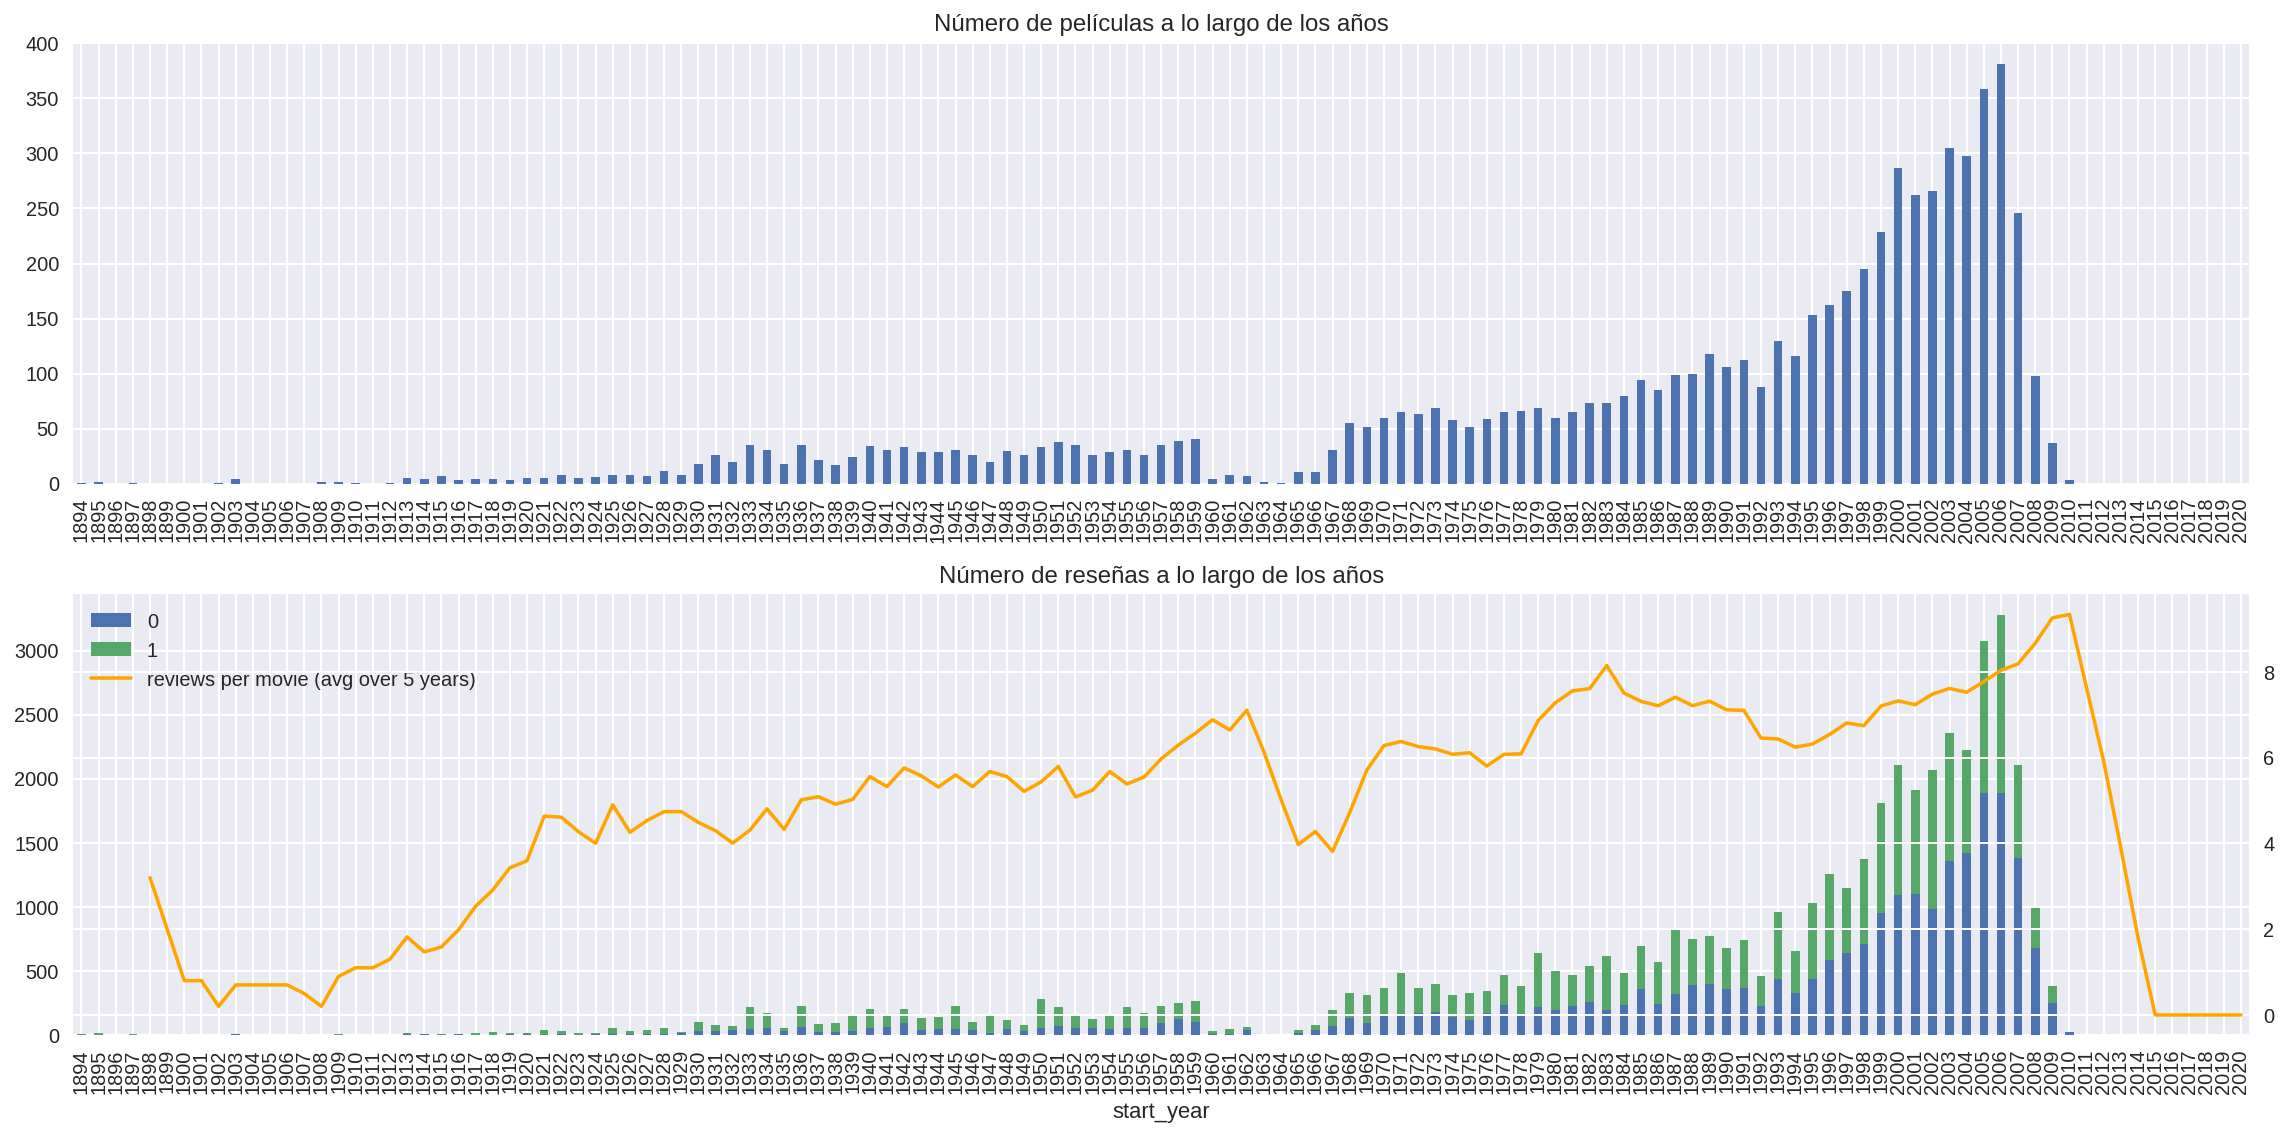

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

#Modificar la leyenda del gráfico
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axt.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

<div class="alert alert-block alert-info">
<b>Hecho!</b> <a class="tocSkip"></a>
</div>

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

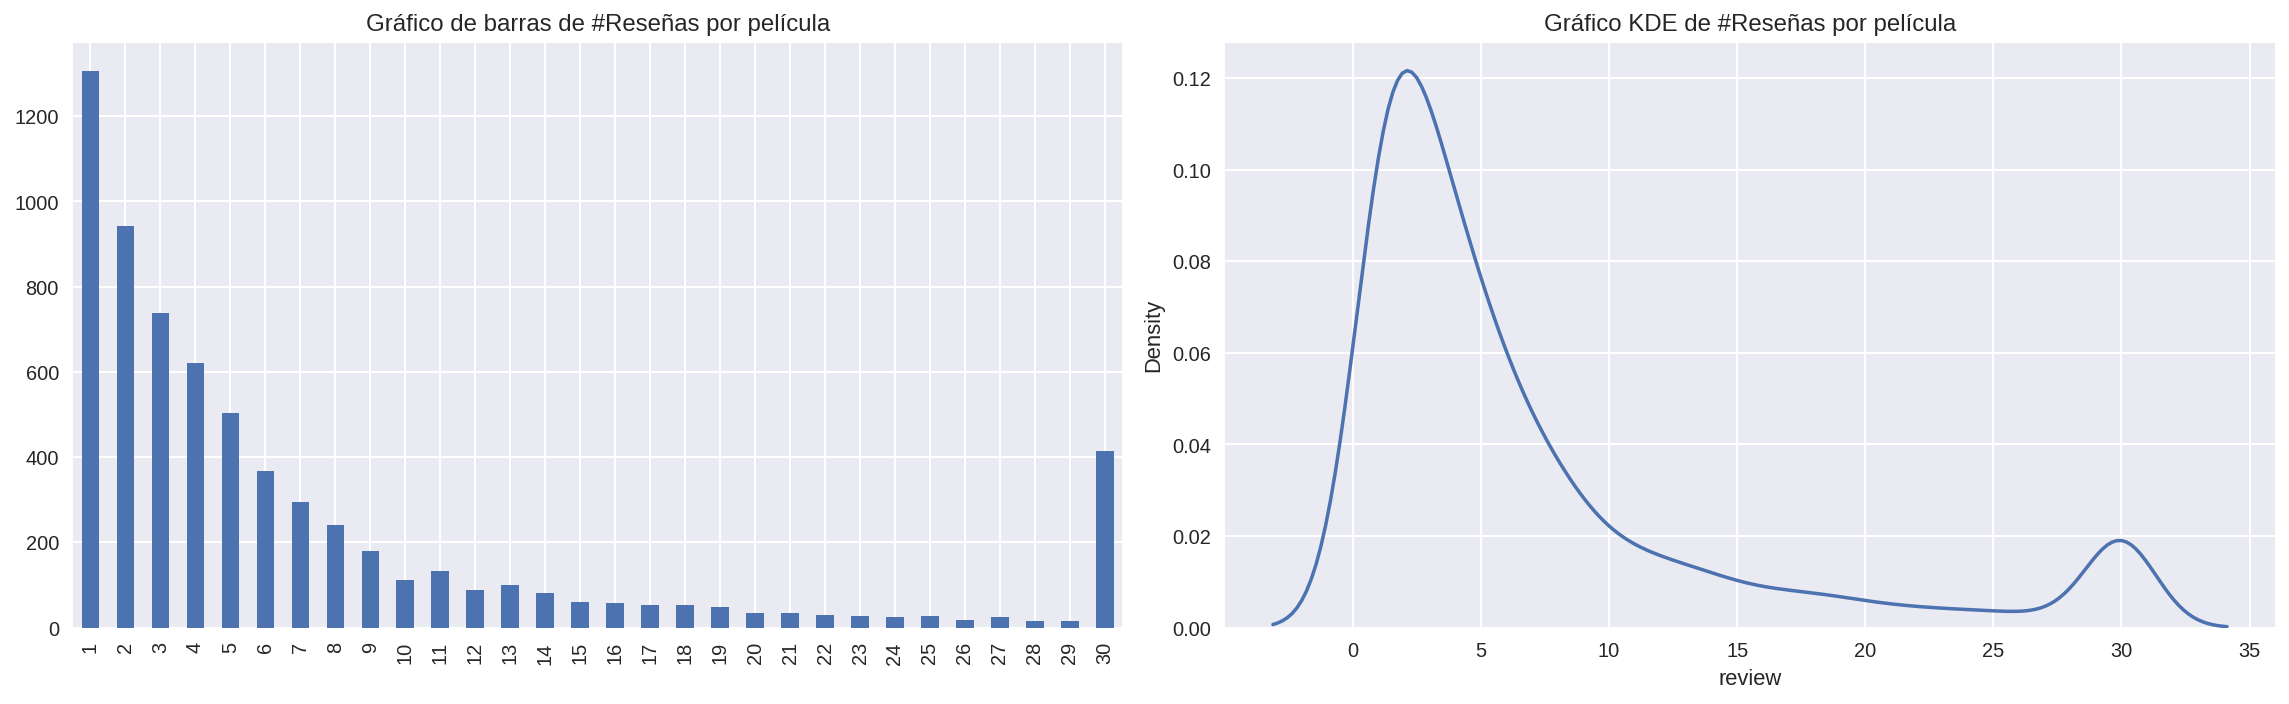

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

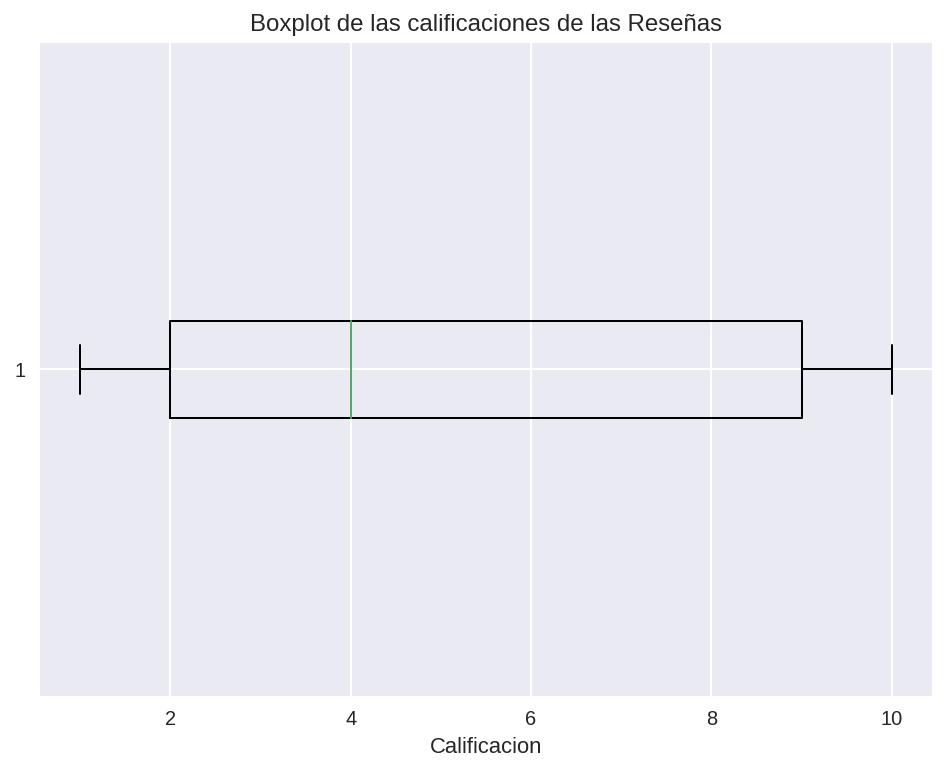

In [16]:
#Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df_reviews['rating'], vert=False)
plt.xlabel('Calificacion')
plt.title('Boxplot de las calificaciones de las Reseñas')
plt.show()

In [17]:
df_reviews['pos'].value_counts(normalize=True)

0    0.501067
1    0.498933
Name: pos, dtype: float64

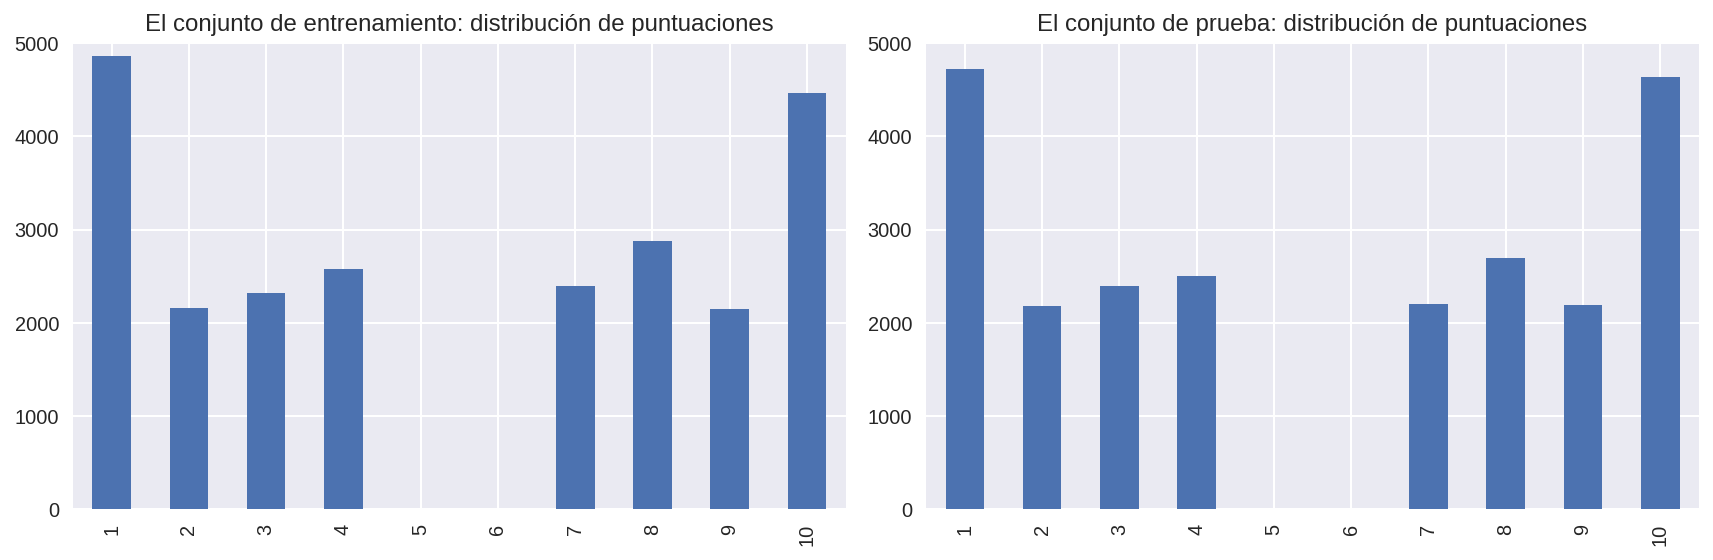

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

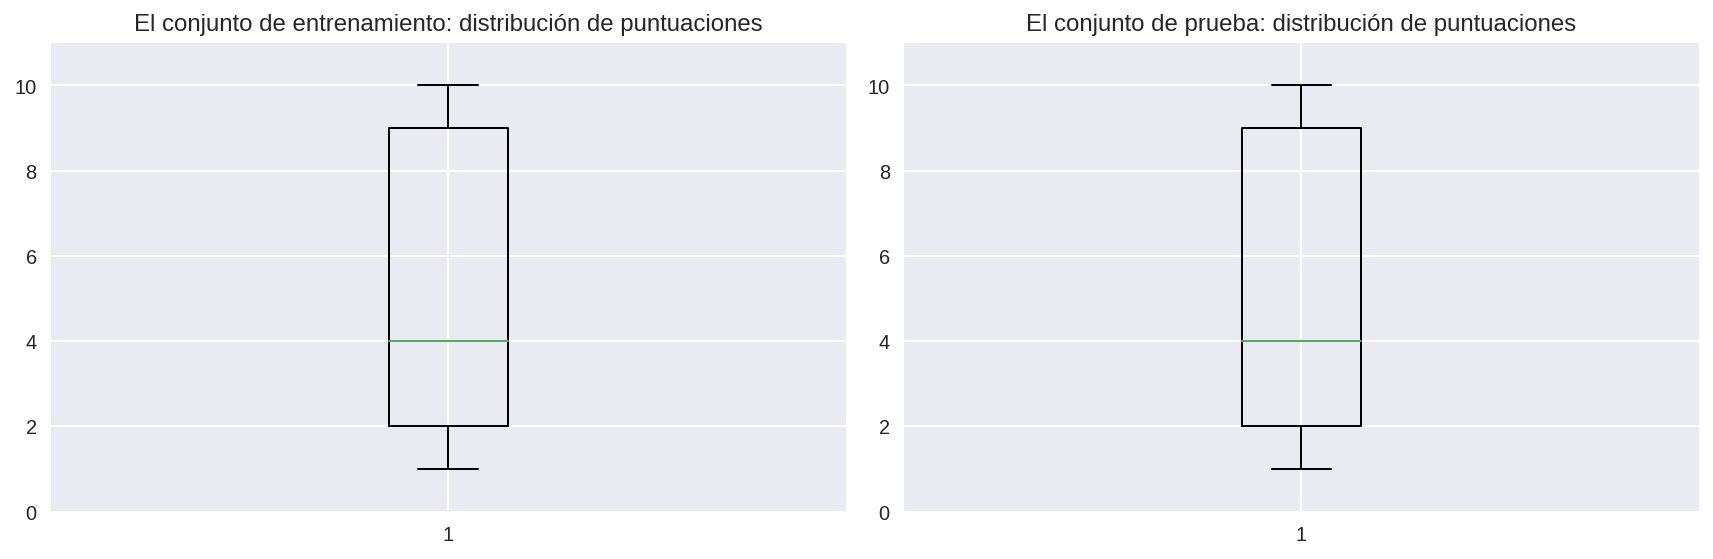

In [19]:
#Crear la figura y los ejes para los diagramas de caja y bigotes
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

#Diagrama de caja y bigotes para el conjunto de entrenamiento
ax = axs[0]
dft_train = df_reviews.query('ds_part == "train"')['rating']
ax.boxplot(dft_train)
ax.set_ylim([0, 11])  #Ajustar el rango del eje y para mostrar valores entre 0 y 11
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

#Diagrama de caja y bigotes para el conjunto de prueba
ax = axs[1]
dft_test = df_reviews.query('ds_part == "test"')['rating']
ax.boxplot(dft_test)
ax.set_ylim([0, 11])  #Ajustar el rango del eje y para mostrar valores entre 0 y 11
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

#Ajustar el diseño de los diagramas de caja y bigotes
fig.tight_layout()

#Mostrar los diagramas de caja y bigotes
plt.show()

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

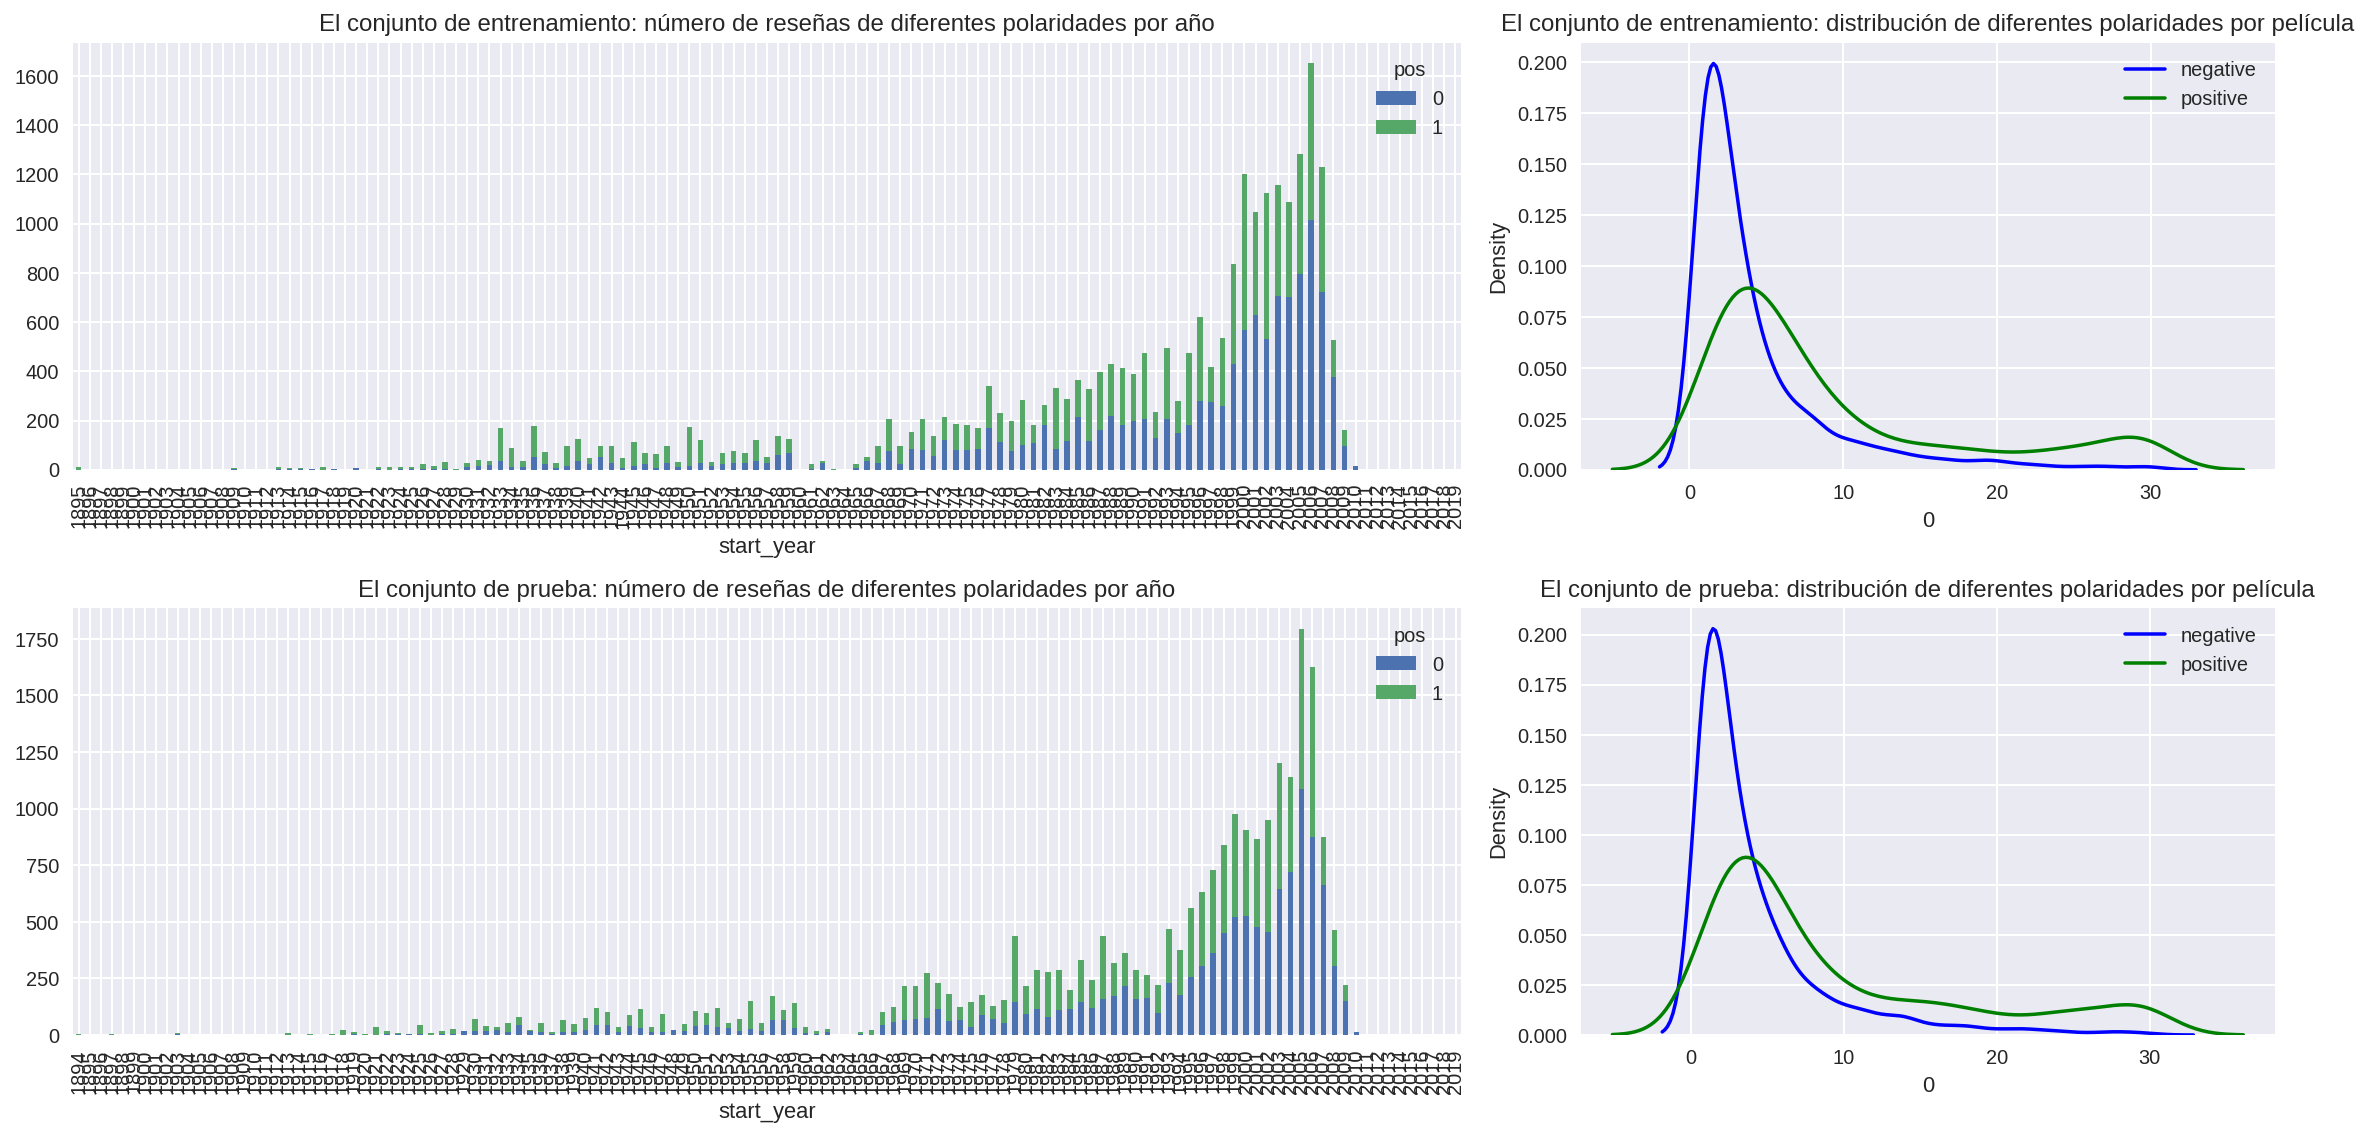

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

<div class="alert alert-block alert-info">
<b>Hecho!</b> <a class="tocSkip"></a>
</div>

In [19]:
reviews_per_year_train = df_reviews.query('ds_part == "train"').groupby('start_year')['pos'].count().to_frame()
reviews_per_year_test = df_reviews.query('ds_part == "test"').groupby('start_year')['pos'].count().to_frame()

In [20]:
reviews_per_year_train

,pos
start_year,
1895,11
1903,1
1908,1
1909,7
1910,1
...,...
2006,1650
2007,1231
2008,527


In [21]:
reviews_per_year_test

,pos
start_year,
1894,6
1895,1
1897,4
1902,1
1903,9
...,...
2006,1625
2007,875
2008,464


En este analisis exploratorio de datos pudimos visualizar algunas cosas, como que en 2006 se sacaron mas peliculas al aire que en el resto de años, por lo que tambien tuvo mas reseñas, y pudimos visualizar tambien un diagrama de caja y bigotes con la misma informacion sobre los conjuntos de distribucion de puntuaciones en el conjunto de entrenamiento y prueba. Tambien vimos la distribucion de diferentes polaridades por pelicula y de numero de reseñas por diferentes polaridades por años. Vimos que la mayoria de reseñas son negativas, y que el año predominante sigue siendo 2006.

## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [22]:
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        #F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        #ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        #PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        #establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        #ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        #establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        #PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div class="alert alert-block alert-info">
<b>Hecho!</b> <a class="tocSkip"></a>
</div>

Creamos una funcion que nos pueda ayudar dando los resultados de precision como ROC, valor F1, Exactitud y APS. A esta funcion tenemos que darle el modelo y los conjuntos de entrenamiento y prueba.

## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

<div class="alert alert-block alert-info">
<b>Hecho!</b> <a class="tocSkip"></a>
</div>

In [24]:
def clear_text(text):
    clean_text = re.sub(r'[^a-zA-Z\s\']', '', text)  # Eliminar caracteres que no sean letras, espacios o apóstrofes
    clean_text = " ".join(clean_text.split())  # Eliminar espacios adicionales

    return clean_text

def preprocess_text_with_nltk(text):
    #Convertir a minúsculas
    text = text.lower()

    #Eliminar dígitos, signos de puntuación y caracteres especiales
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    #Tokenización de palabras
    words = word_tokenize(text)

    #Eliminar stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    #Lematización
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    #Unir las palabras preprocesadas en un texto nuevamente
    preprocessed_text = ' '.join(words)

    return preprocessed_text

In [25]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

<div class="alert alert-block alert-info">
<b>Hecho!</b> <a class="tocSkip"></a>
</div>

In [26]:
def preprocess_text_with_spacy(text):
    #Convertir el texto a minúsculas
    text = text.lower()

    #Tokenización de palabras
    doc = nlp(text)
    words = [token.lemma_ for token in doc if not token.is_punct and not token.is_digit]

    #Eliminar stop words
    words = [word for word in words if word not in STOP_WORDS]

    #Unir las palabras preprocesadas en un texto nuevamente
    preprocessed_text = ' '.join(words)

    return preprocessed_text

In [27]:
df_reviews['clean_review'] = df_reviews['review'].apply(clear_text)

In [28]:
df_reviews['review_norm_sp'] = df_reviews["review"].apply(preprocess_text_with_spacy)
df_reviews['review_norm_nltk'] = df_reviews["review"].apply(preprocess_text_with_nltk)

In [29]:
df_reviews.drop(columns=['review'], inplace=True)

Hacemos el preprocesamiento de datos, haciendo una limpieza con una funcion llamada "clear_text()" y otras dos. Estas dos serian usando dos distintas librerias que ofrecen la tokenizacion, como son "spacy" y "nltk", para poder contrastar los diferentes resultados que dan con distintas maneras de ser preprocesadas

## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [30]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

N = 7000

#Seleccionamos muestras aleatorias
train_data_sample = df_reviews_train.sample(n=N, random_state=42)
test_data_sample = df_reviews_test.sample(n=N, random_state=42)

train_features_sp = train_data_sample["review_norm_sp"]
train_features_nltk = train_data_sample["review_norm_nltk"]

test_features_sp = test_data_sample["review_norm_sp"]
test_features_nltk = test_data_sample["review_norm_nltk"]

train_features = train_data_sample['clean_review']
test_features = test_data_sample['clean_review']

train_target = train_data_sample['pos']
test_target = test_data_sample['pos']

print(train_features.shape)
print(train_target.shape)

(7000,)
(7000,)


Creamos los conjuntos de prueba y entrenamiento, dependiendo del modo de preprocesamiento que se haya utilizado.

## Trabajar con modelos

### Modelo 0 - Constante

<div class="alert alert-block alert-info">
<b>Hecho!</b> <a class="tocSkip"></a>
</div>

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


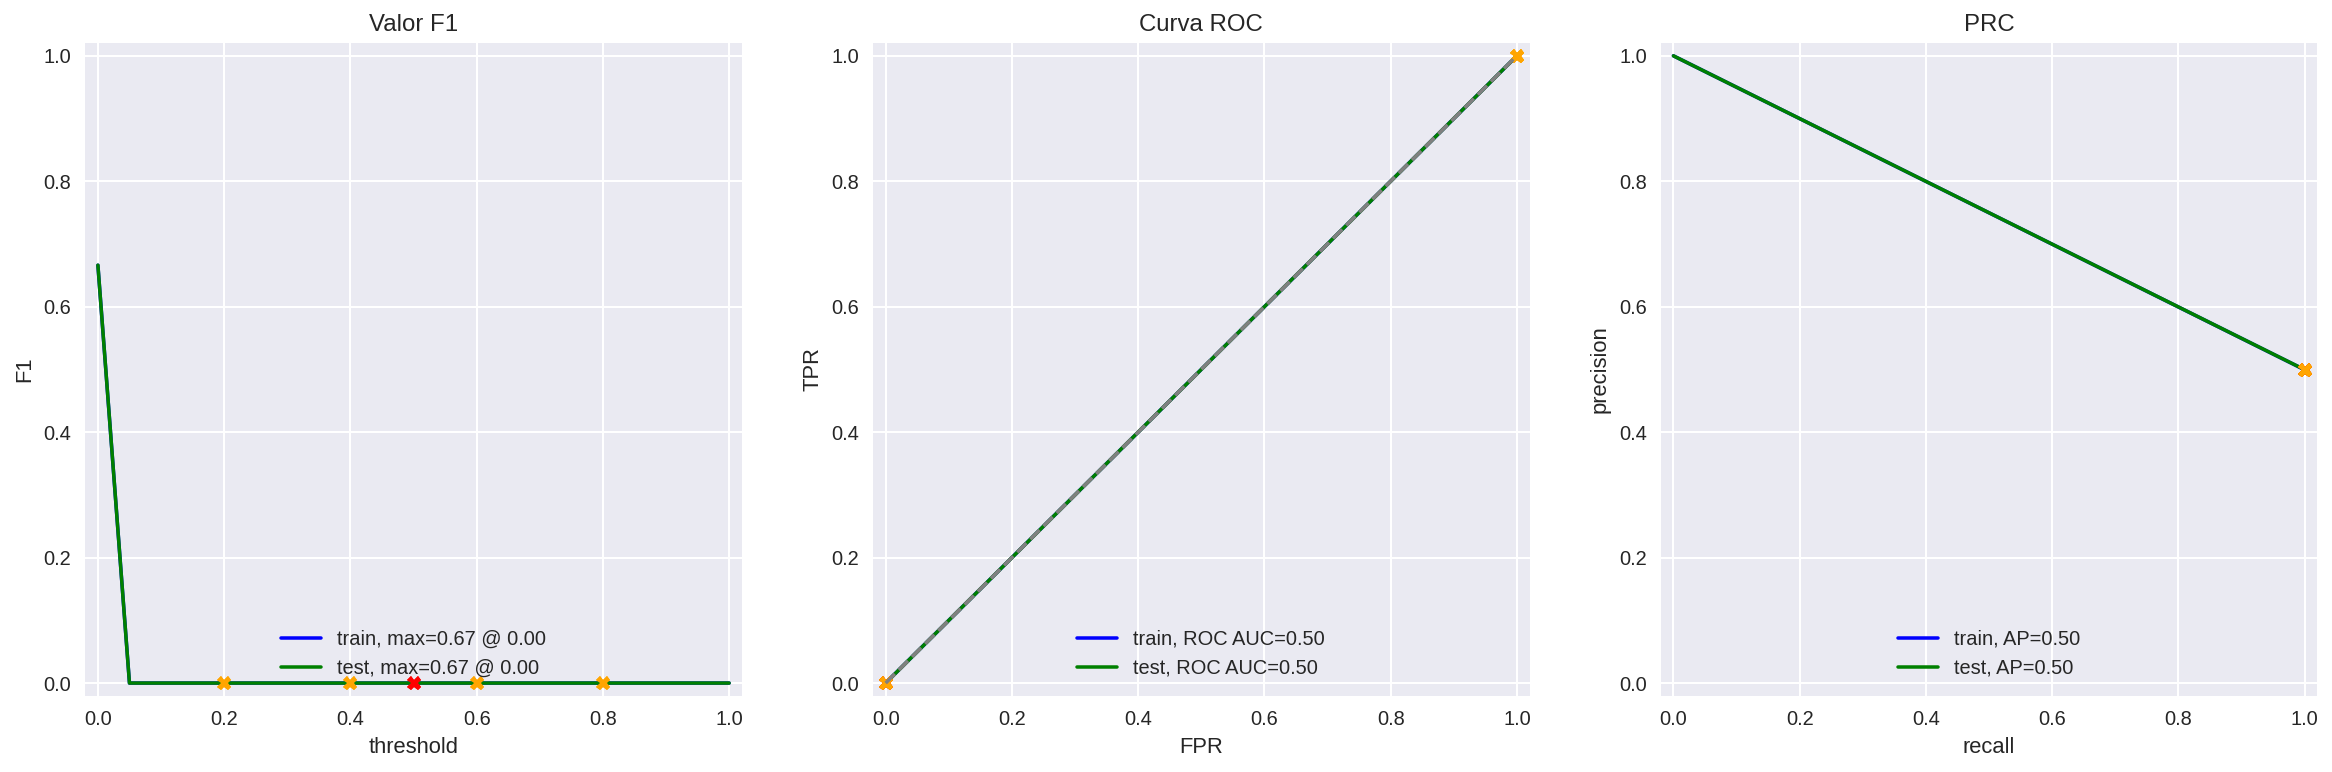

In [32]:
#Entrenar el modelo de Constante en el conjunto de entrenamiento utilizando la estrategia "most_frequent"
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(train_features, train_target)

#Realizar predicciones en el conjunto de prueba
predictions = dummy_model.predict(test_features)

#Evaluar el modelo utilizando la función evaluate_model
evaluate_model(dummy_model, train_features, train_target, test_features, test_target)

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


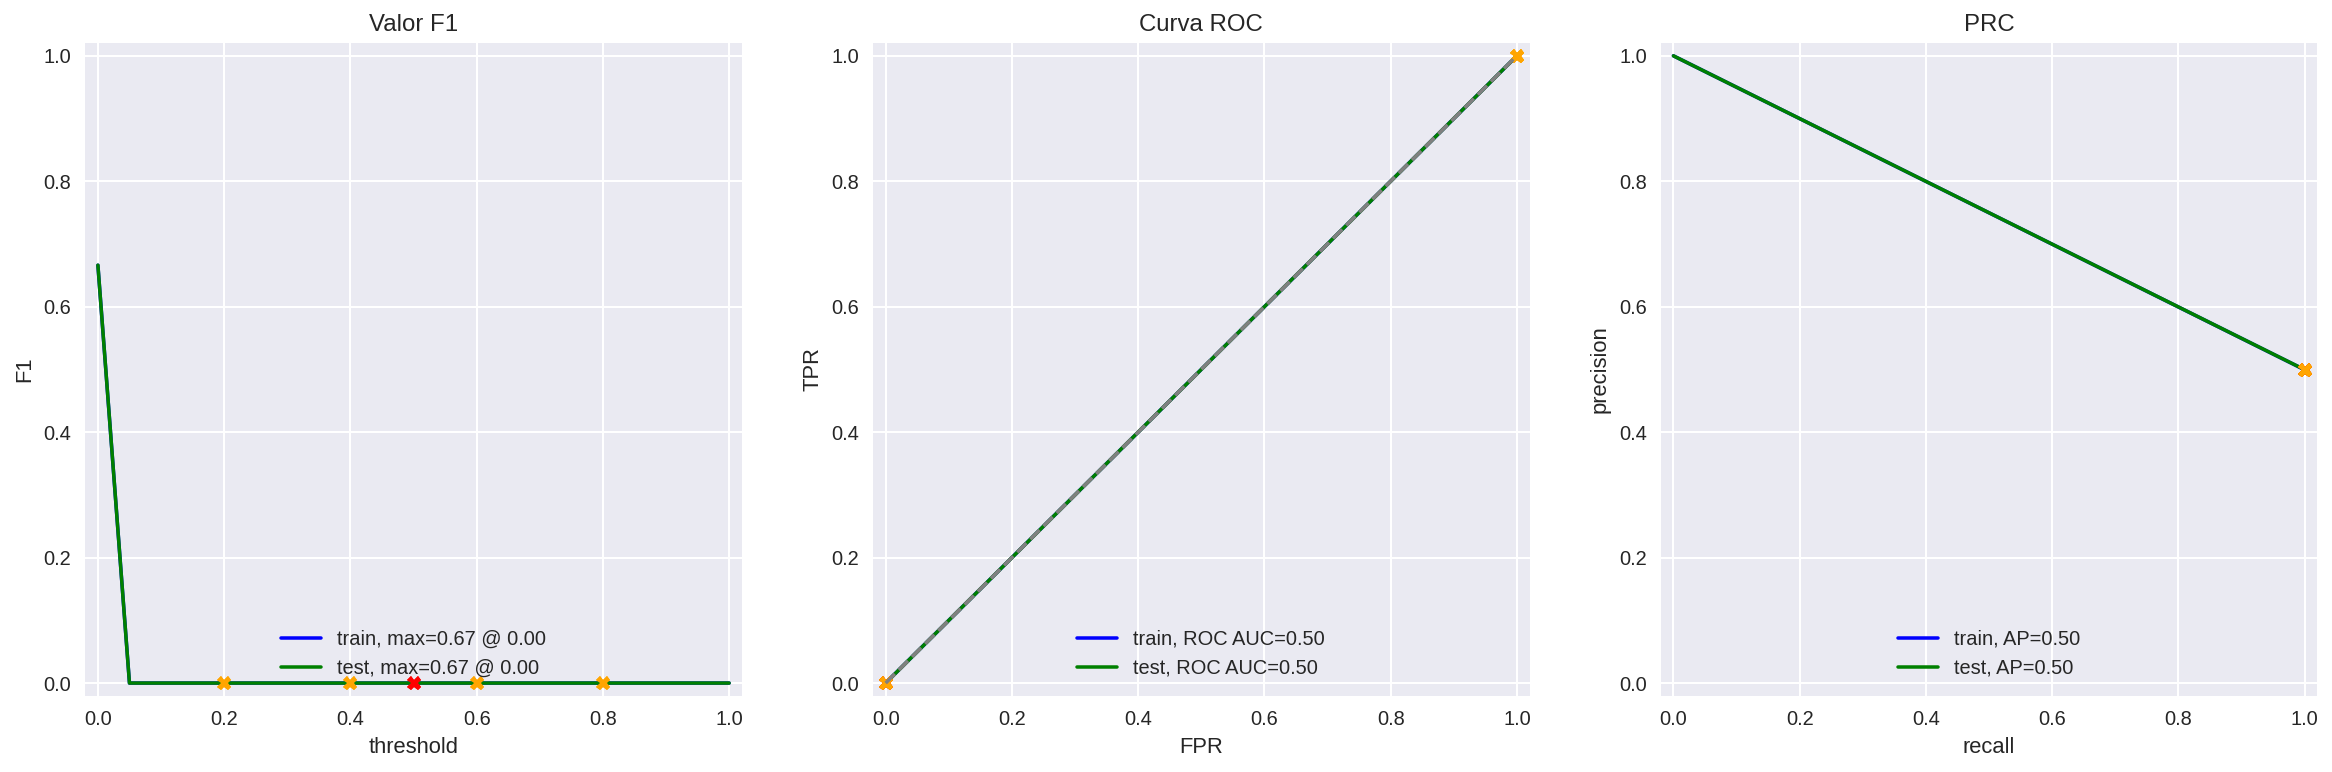

In [33]:
#Entrenar el modelo de Constante en el conjunto de entrenamiento utilizando la estrategia "most_frequent"
dummy_model_sp = DummyClassifier(strategy="most_frequent")
dummy_model_sp.fit(train_features_sp, train_target)

#Realizar predicciones en el conjunto de prueba
predictions_sp = dummy_model_sp.predict(test_features_sp)

#Evaluar el modelo utilizando la función evaluate_model
evaluate_model(dummy_model_sp, train_features_sp, train_target, test_features_sp, test_target)

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


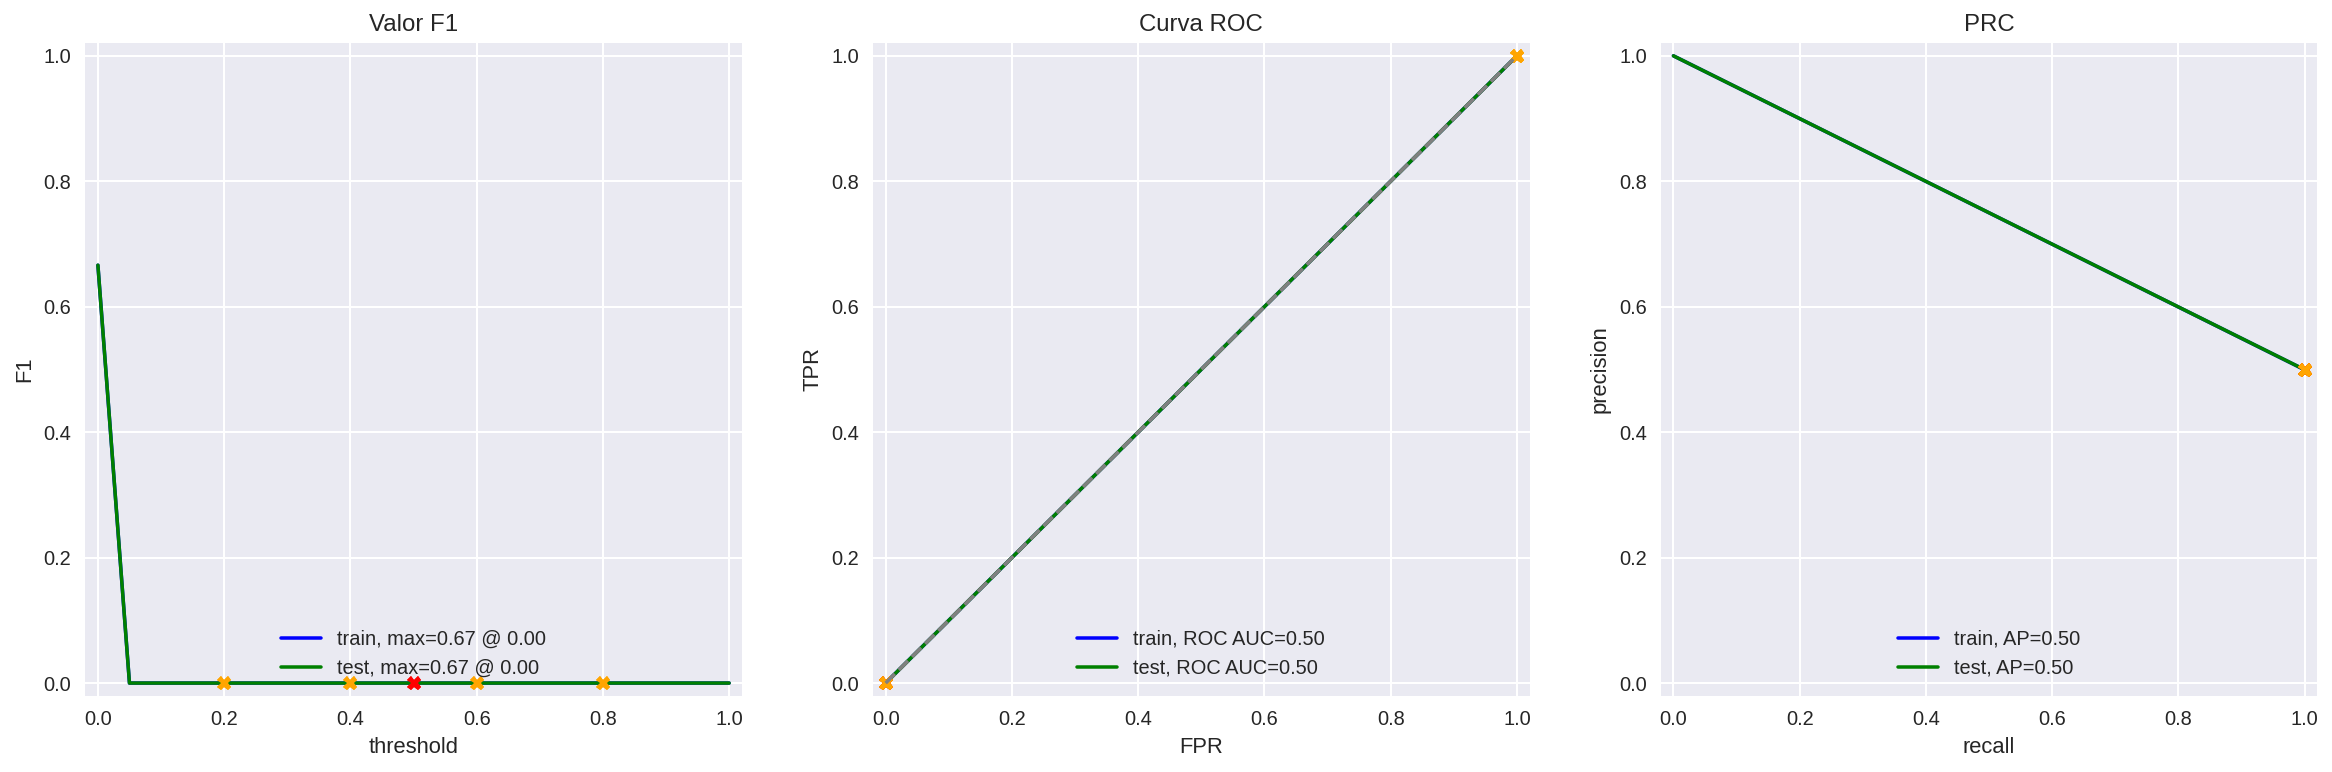

In [34]:
#Entrenar el modelo de Constante en el conjunto de entrenamiento utilizando la estrategia "most_frequent"
dummy_model_nltk = DummyClassifier(strategy="most_frequent")
dummy_model_nltk.fit(train_features_nltk, train_target)

#Realizar predicciones en el conjunto de prueba
predictions_nltk = dummy_model_nltk.predict(test_features_nltk)

#Evaluar el modelo utilizando la función evaluate_model
evaluate_model(dummy_model_nltk, train_features_nltk, train_target, test_features_nltk, test_target)

Vimos que el modelo constante no logra alcanzar el umbral con ninguno de los conjuntos usados. Vamos a seguir probando diferentes modelos.

### Modelo 1 - NLTK, TF-IDF y LR

TF-IDF

<div class="alert alert-block alert-info">
<b>Hecho!</b> <a class="tocSkip"></a>
</div>

In [36]:
#Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

#Ajustar y transformar los datos de entrenamiento y prueba
train_features_tfidf = tfidf_vectorizer.fit_transform(train_features_nltk)
test_features_tfidf = tfidf_vectorizer.transform(test_features_nltk)

#train_features_tfidf y test_features_tfidf ahora son matrices numéricas que representan el texto preprocesado

<div class="alert alert-block alert-info">
<b>Hecho!</b> <a class="tocSkip"></a>
</div>

In [38]:
#Obtener los valores únicos de la matriz dispersa
valores_unicos_1 = np.unique(train_features_tfidf.data)

#Imprimir los valores únicos
print(valores_unicos_1)

[0.00561287 0.00573217 0.00584957 ... 0.8369877  0.86299521 0.8689002 ]


In [39]:
#Obtener los valores únicos de la matriz dispersa
valores_unicos_2 = np.unique(test_features_tfidf.data)

#Imprimir los valores únicos
print(valores_unicos_2)

[0.00475029 0.00522037 0.00536414 ... 0.88135972 0.88344923 0.88757592]


In [40]:
#Usamos el modelo de Regresion logistica, lo entrenamos y hacemos predicciones
model_1 = LogisticRegression()
model_1.fit(train_features_tfidf, train_target)

predictions_tfidf = model_1.predict(test_features_tfidf)

          train  test
Accuracy   0.95  0.86
F1         0.95  0.86
APS        0.99  0.94
ROC AUC    0.99  0.94


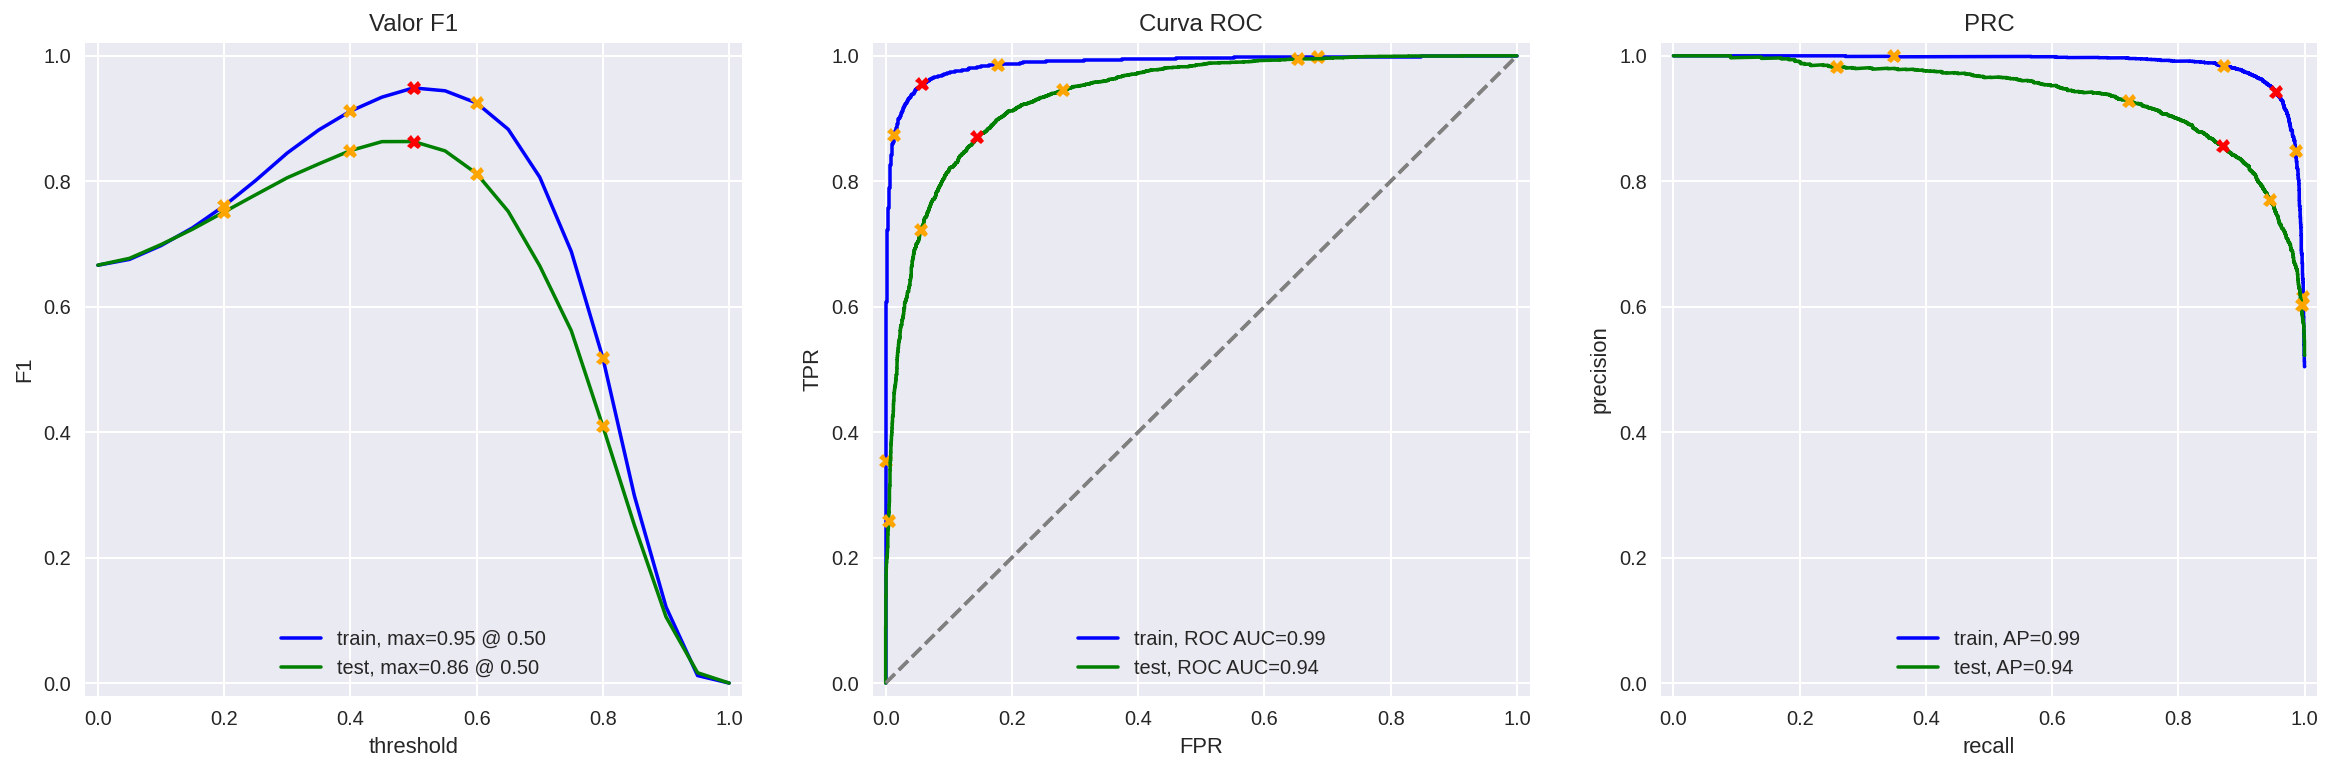

In [41]:
#Aplicamos la funcion evaluate_model
evaluate_model(model_1, train_features_tfidf, train_target, test_features_tfidf, test_target)

Transformamos las calificaciones con TF-IDF y usamos los datos de nltk. El modelo tiene resultados que dan muy buenas expectativas, pero hay que seguir viendo si hay mejores resultados con el resto de modelos.

### Modelo 3 - spaCy, TF-IDF y LR

In [42]:
#Inicializar el vectorizador TF-IDF
tfidf_vectorizer_2 = TfidfVectorizer()

#Ajustar y transformar los datos de entrenamiento y prueba
train_features_tfidf_2 = tfidf_vectorizer_2.fit_transform(train_features_sp)
test_features_tfidf_2 = tfidf_vectorizer_2.transform(test_features_sp)

#train_features_tfidf_2 y test_features_tfidf_2 ahora son matrices numéricas que representan el texto preprocesado

In [43]:
#Usamos el modelo de Regresion logistica, lo entrenamos y hacemos predicciones con spacy
model_3 = LogisticRegression()
model_3.fit(train_features_tfidf_2, train_target)

predictions_tfidf_2 = model_3.predict(test_features_tfidf_2)

          train  test
Accuracy   0.94  0.86
F1         0.94  0.86
APS        0.99  0.93
ROC AUC    0.98  0.93


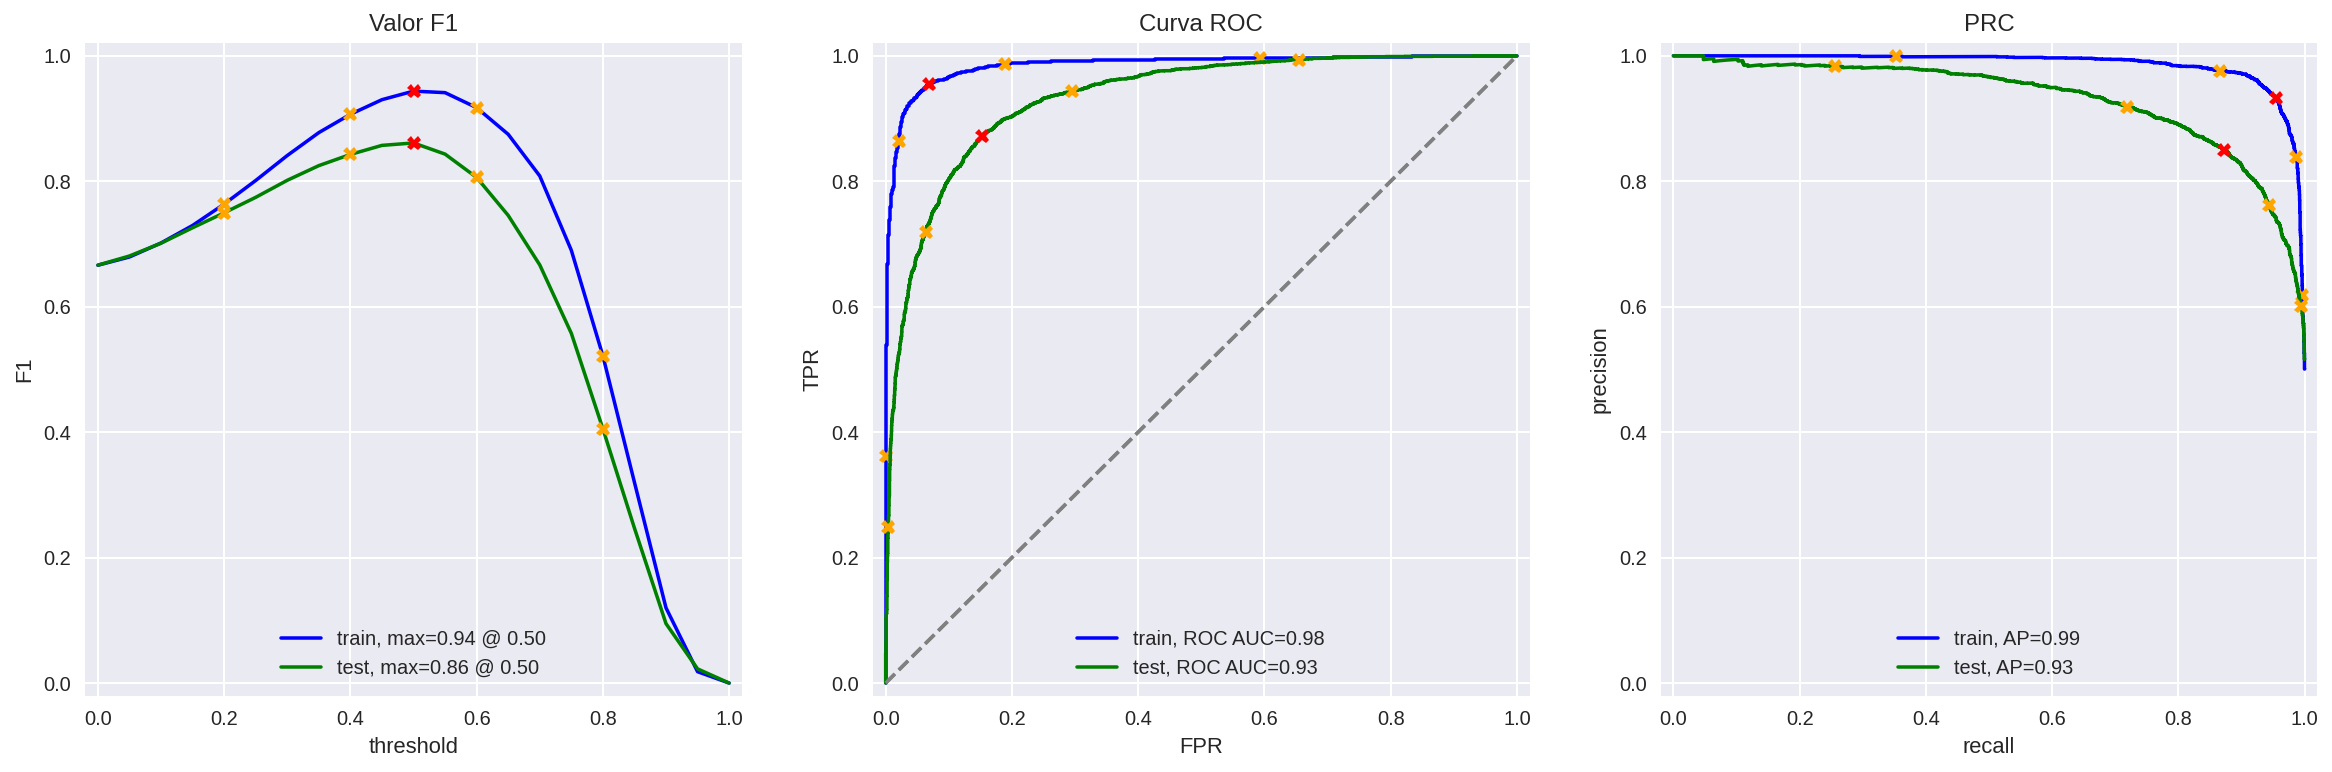

In [44]:
#Aplicamos la funcion evaluate_model
evaluate_model(model_3, train_features_tfidf_2, train_target, test_features_tfidf_2, test_target)

Seguimos usando TF-IDF con la regresion lineal pero con la diferencia de usar los datos que fueron preprocesados con la herramienta "spacy". Vemos que los resultados del modelo fueron muy buenos, ahora falta probar el ultimo modelo.

### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

<div class="alert alert-block alert-info">
<b>Hecho!</b> <a class="tocSkip"></a>
</div>

In [46]:
#Usamos el modelo de LightBoost, lo entrenamos y hacemos predicciones
model_4 = LGBMClassifier()
model_4.fit(train_features_tfidf_2, train_target)

predictions_lgbm = model_4.predict(test_features_tfidf_2)

          train  test
Accuracy   0.97  0.84
F1         0.97  0.84
APS        1.00  0.92
ROC AUC    1.00  0.92


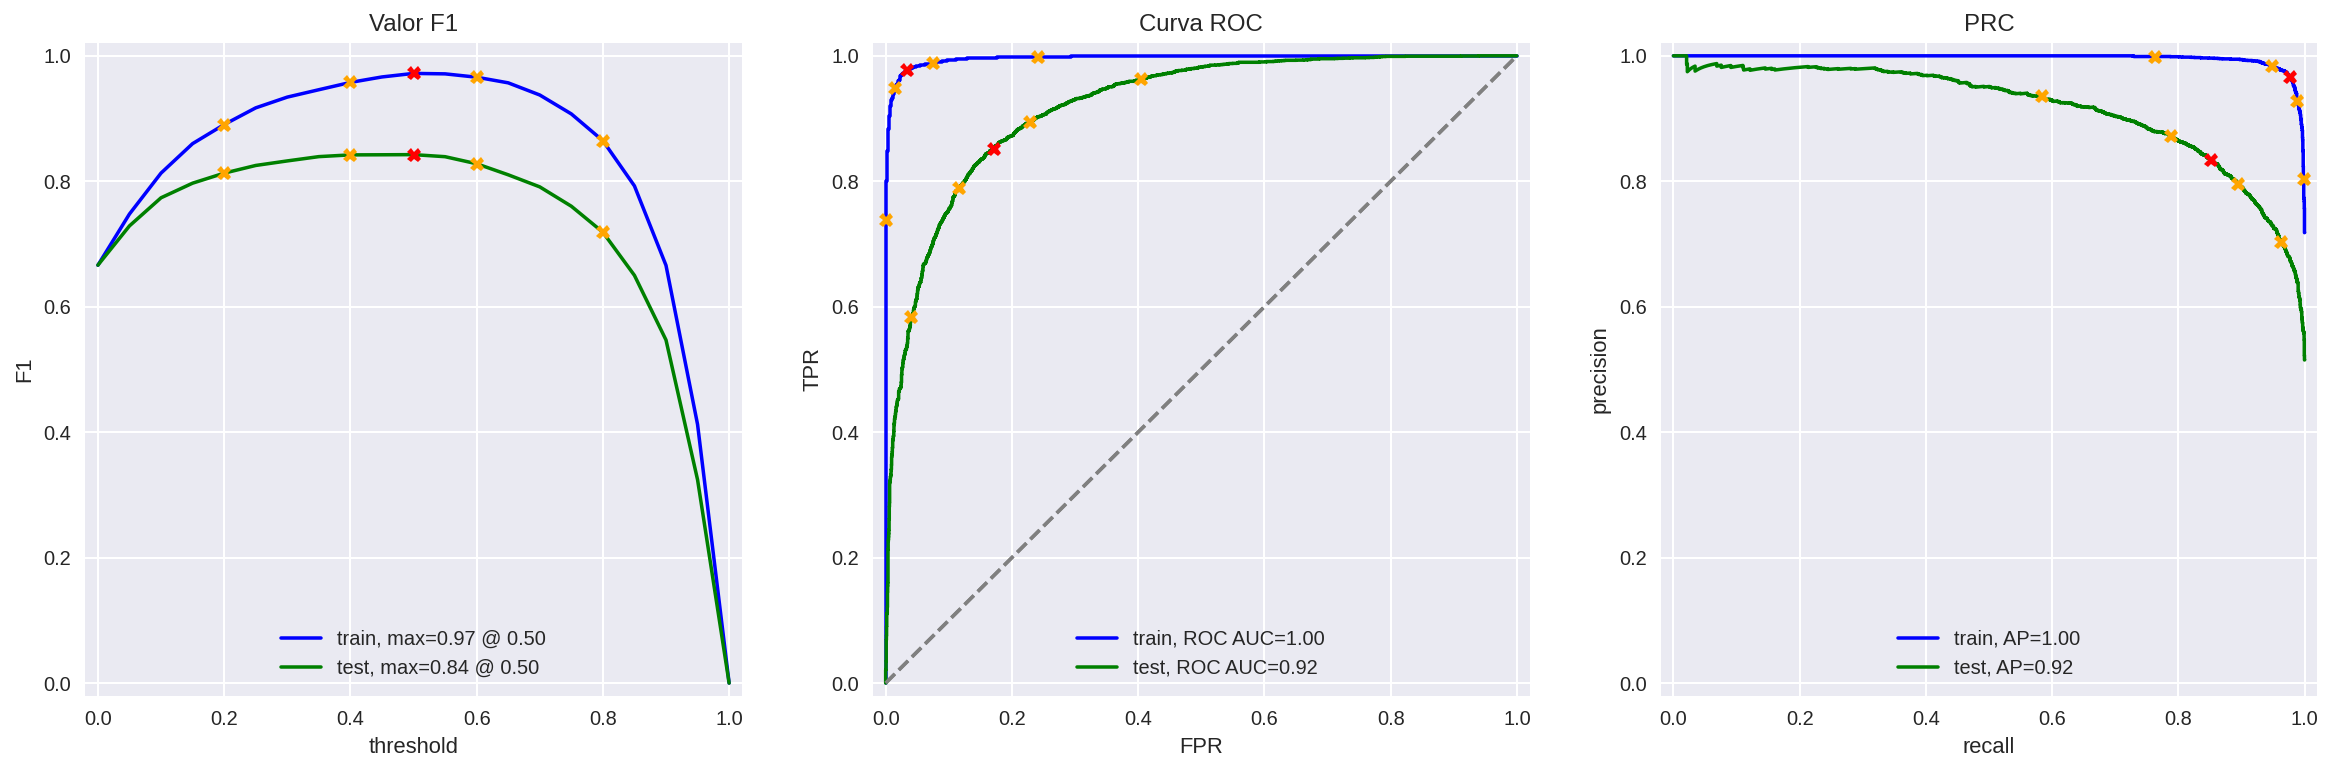

In [47]:
#Aplicamos la funcion evaluate_model
evaluate_model(model_4, train_features_tfidf_2, train_target, test_features_tfidf_2, test_target)

Por ultimo, usamos un modelo de descenso de gradiente, con TF-IDF y "spacy". Vemos que tambien tiene buenos resultados pero no tan buenos como los otros dos modelos.

<div class="alert alert-block alert-info">
<b>Hecho!</b> <a class="tocSkip"></a>
</div>

## Mis reseñas

In [54]:
# puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

my_reviews['review_norm'] = my_reviews['review'].apply(clear_text)# <escribe aquí la misma lógica de normalización que para el conjunto de datos principal>

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",I did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",Well I was bored and felt asleep in the middle...
2,I was really fascinated with the movie,I was really fascinated with the movie
3,Even the actors looked really old and disinter...,Even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,I didn't expect the reboot to be so good Write...
5,"The movie had its upsides and downsides, but I...",The movie had its upsides and downsides but I ...
6,What a rotten attempt at a comedy. Not a singl...,What a rotten attempt at a comedy Not a single...
7,Launching on Netflix was a brave move & I real...,Launching on Netflix was a brave move I really...


Por prueba hicimos reseñas propias, a las cuales le aplicamos la funcion de "clear_text()", y vamos a probar con los modelos ya creados.

### Modelo 1

In [55]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_1.predict_proba(tfidf_vectorizer.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.42:  I did not simply like it not my kind of movie
0.47:  Well I was bored and felt asleep in the middle of the movie
0.55:  I was really fascinated with the movie
0.41:  Even the actors looked really old and disinterested and they got paid to be in the movie What a soul
0.52:  I didn't expect the reboot to be so good Writers really cared about the source material
0.54:  The movie had its upsides and downsides but I feel like overall it's a decent flick I could see myse
0.26:  What a rotten attempt at a comedy Not a single joke lands everyone acts annoying and loud even kids 
0.71:  Launching on Netflix was a brave move I really appreciate being able to binge on episode after episo


Probamos el primer modelo usado que use TF-IDF, LogisticRegression. Vemos que sus resultados son buenos pero hay que seguir viendo.

### Modelo 3

In [56]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_2.transform(texts.apply(lambda x: preprocess_text_with_spacy(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.20:  I did not simply like it not my kind of movie
0.26:  Well I was bored and felt asleep in the middle of the movie
0.51:  I was really fascinated with the movie
0.25:  Even the actors looked really old and disinterested and they got paid to be in the movie What a soul
0.39:  I didn't expect the reboot to be so good Writers really cared about the source material
0.52:  The movie had its upsides and downsides but I feel like overall it's a decent flick I could see myse
0.11:  What a rotten attempt at a comedy Not a single joke lands everyone acts annoying and loud even kids 
0.79:  Launching on Netflix was a brave move I really appreciate being able to binge on episode after episo


Este es el modelo de regresion logistica con spacy. Vemos que tiene predicciones algo certeras, pero vamos a seguir investigando.|

### Modelo 4

In [57]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_2
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: preprocess_text_with_spacy(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.65:  I did not simply like it not my kind of movie
0.42:  Well I was bored and felt asleep in the middle of the movie
0.58:  I was really fascinated with the movie
0.32:  Even the actors looked really old and disinterested and they got paid to be in the movie What a soul
0.61:  I didn't expect the reboot to be so good Writers really cared about the source material
0.55:  The movie had its upsides and downsides but I feel like overall it's a decent flick I could see myse
0.16:  What a rotten attempt at a comedy Not a single joke lands everyone acts annoying and loud even kids 
0.74:  Launching on Netflix was a brave move I really appreciate being able to binge on episode after episo


Este modelo contiene el descenso de gradiente con LightGBM. Vemos tambien las predicciones y son algo certeras pero no las mejores en comparacion a los modelos de regresion logistica. Podemos dar por sentado que la regresion logistica con nltk fue el que tuvo mejores predicciones.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo en esta sección.
    
</div>

<div class="alert alert-block alert-info">
<b>Gracias!</b> <a class="tocSkip"></a>
</div>

## Conclusiones

En este análisis exploratorio de datos y construcción de modelos para clasificar reseñas de películas, hemos realizado diversas visualizaciones y evaluaciones de desempeño con el objetivo de identificar reseñas negativas de forma automática. A lo largo del proceso, hemos utilizado diferentes técnicas de preprocesamiento de texto, como limpieza y tokenización, mediante las bibliotecas "nltk" y "spacy".

Los modelos de aprendizaje automático que hemos utilizado incluyen la Regresión Logística y el Descenso de Gradiente con LightGBM, ambos aplicados sobre la representación TF-IDF de las reseñas. Además, también evaluamos un modelo constante como referencia.

Nuestros hallazgos revelan que el modelo de Regresión Logística con preprocesamiento mediante "nltk" obtuvo los resultados más sólidos y precisos en términos de detección de reseñas negativas. Este modelo superó al resto en métricas como el valor F1, la precisión y el área bajo la curva ROC.

En resumen, hemos desarrollado un sistema efectivo para la clasificación de reseñas de películas, centrándonos en identificar aquellas que son negativas. Si bien la implementación de modelos más complejos como BERT quedó descartada debido a limitaciones de recursos computacionales, logramos obtener resultados satisfactorios con modelos más ligeros y técnicas adecuadas de preprocesamiento. Con un valor F1 superior a 0.85, nuestro sistema cumple con los objetivos propuestos por Film Junky Union para garantizar la precisión en la categorización de reseñas.

Es importante mencionar que, aunque la Regresión Logística con "nltk" se destacó en nuestros experimentos, siempre existe margen para mejorar el rendimiento utilizando otras técnicas y explorando diferentes enfoques. Con más tiempo y recursos, podríamos explorar modelos más avanzados y ajustar aún más nuestros algoritmos para mejorar aún más la precisión del sistema.

En definitiva, este proyecto demuestra la importancia del análisis de sentimientos y el procesamiento de lenguaje natural en el ámbito del entretenimiento y las reseñas de películas. Nuestro sistema tiene el potencial de ser una herramienta valiosa para la comunidad Film Junky Union al clasificar y filtrar reseñas de películas de forma eficiente y automática.

<div class="alert alert-block alert-danger">
    
# Conclusiones generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo, Julio. Debemos corregir algunos elementos más de forma que de fondo para poder aprobar tu proyecto. He dejado comentarios a lo largo del documento para ello.
</div>

<div class="alert alert-block alert-info">
<b>Gracias! He corregido lo solicitado.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
    
# Conclusiones generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido, Julio. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>

# Lista de comprobación

- [x]  Abriste el notebook
- [x]  Cargaste y preprocesaste los datos de texto para su vectorización
- [x]  Transformaste los datos de texto en vectores
- [x]  Entrenaste y probaste los modelos
- [x]  Se alcanzó el umbral de la métrica
- [x]  Colocaste todas las celdas de código en el orden de su ejecución
- [x]  Puedes ejecutar sin errores todas las celdas de código 
- [x]  Hay conclusiones 